# *Getting started with Kaggle*
### Intro to Kaggle

In [60]:
import pandas as pd
pd.set_option('display.max_columns', 500)

test = pd.read_csv("test.csv")
test_shape = test.shape
print(test_shape)

train  = pd.read_csv('train.csv')
train_shape = train.shape
print(test_shape)

(418, 11)
(418, 11)


In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploring the Data

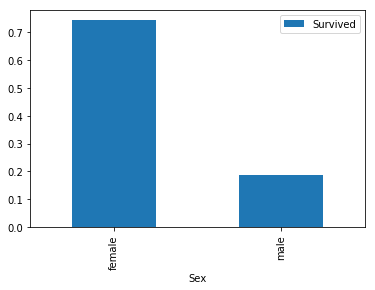

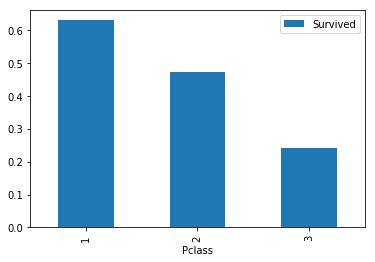

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

sex_pivot = train.pivot_table(index='Sex', values='Survived')
sex_pivot.plot.bar()
plt.show()

pclass_pivot = train.pivot_table(index='Pclass', values='Survived')
pclass_pivot.plot.bar()
plt.show()

### Exploring and Converting the Age Column

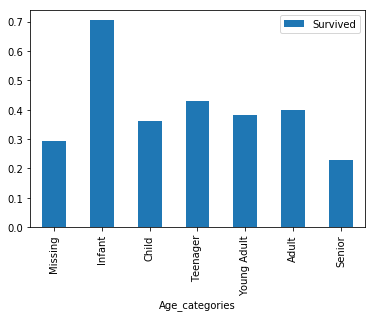

In [44]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ['Missing', 'Infant', 'Child', 'Teenager', 
               'Young Adult', 'Adult', 'Senior']

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

age_pivot = train.pivot_table(index='Age_categories', values='Survived')
age_pivot.plot.bar()
plt.show()

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


### Preparing our Data for Machine Learning

In [46]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummies], axis=1)
    return df

cols_to_dummy = ['Pclass', 'Sex', 'Age_categories']

for item in cols_to_dummy:
    train = create_dummies(train, item)
    test = create_dummies(test, item)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,0,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0


In [47]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult,0,0,1,1,0,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior,0,1,0,0,1,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Young Adult,0,0,1,1,0,0,0,0,0,1,0,0


### Creating Our First Machine Learning Model

In [48]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')

lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Splitting Our Training Data

In [49]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2, random_state=0)

### Making Predictions and Measuring their Accuracy

In [50]:
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='lbfgs')
lr.fit(train_X, train_y)

predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.8100558659217877


### Using Cross Validation for More Accurate Error Measurement

In [51]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression(solver='lbfgs')
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = np.mean(scores)

print(scores)
print(accuracy)

[0.8        0.81111111 0.7752809  0.87640449 0.80898876 0.78651685
 0.76404494 0.76404494 0.83146067 0.80681818]
0.8024670865963002


### Making Predictions on Unseen Data

In [52]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(test[columns])

### Creating a Submission File

In [53]:
test_ids = test['PassengerId']
submission = pd.DataFrame({"PassengerId": test_ids, "Survived": holdout_predictions})
submission.to_csv('submission.csv', index=False)
pd.read_csv('submission.csv').head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# *Feature Preparation, Selection and Engineering*
### Introduction

In [113]:
import pandas as pd

train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

def process_age(df):
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = process_age(train)
holdout = process_age(holdout)

cols_to_dummy = ["Age_categories", "Pclass", "Sex"]

for item in cols_to_dummy:
    train = create_dummies(train, item)
    holdout = create_dummies(holdout, item)
    
print(train.columns)   

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male'],
      dtype='object')


### Preparing More Features

In [114]:
columns = ['SibSp','Parch','Fare','Cabin','Embarked']
print(train[columns].describe(include='all',percentiles=[]))

             SibSp       Parch        Fare        Cabin Embarked
count   891.000000  891.000000  891.000000          204      889
unique         NaN         NaN         NaN          147        3
top            NaN         NaN         NaN  C23 C25 C27        S
freq           NaN         NaN         NaN            4      644
mean      0.523008    0.381594   32.204208          NaN      NaN
std       1.102743    0.806057   49.693429          NaN      NaN
min       0.000000    0.000000    0.000000          NaN      NaN
50%       0.000000    0.000000   14.454200          NaN      NaN
max       8.000000    6.000000  512.329200          NaN      NaN


In [115]:
from sklearn.preprocessing import minmax_scale
# The holdout set has a missing value in the Fare column which
# we'll fill with the mean.
holdout["Fare"] = holdout["Fare"].fillna(train["Fare"].mean())

train['Embarked'] = train['Embarked'].fillna('S')
holdout['Embarked'] = holdout['Embarked'].fillna('S')

train = create_dummies(train, 'Embarked')
holdout = create_dummies(holdout, 'Embarked')

cols = ["SibSp","Parch","Fare"]
for column in cols:
    train[column + '_scaled'] = minmax_scale(train[column])
    holdout[column + '_scaled'] = minmax_scale(holdout[column])

train.head()

/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_scaled,Parch_scaled,Fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.125,0.0,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0.125,0.0,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0.000,0.0,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0.125,0.0,0.103644
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.000,0.0,0.015713


### Determining the Most Relevant Features

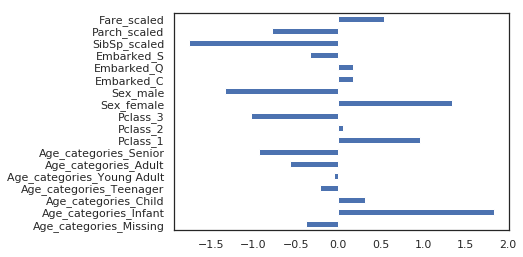

In [116]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']

lr = LogisticRegression(solver='lbfgs')
lr.fit(train[columns], train['Survived'])
coefficients = lr.coef_

feature_importance = pd.Series(coefficients[0], index=columns)
feature_importance.plot.barh()
plt.show()

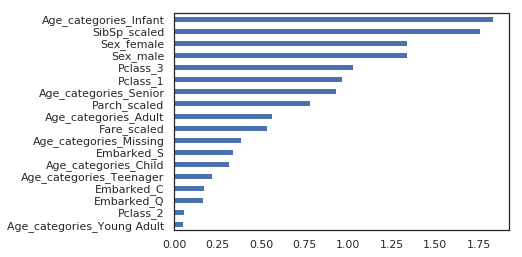

In [117]:
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

In [118]:
most_rel_features = ordered_feature_importance[-8:].index
most_rel_features

Index(['Parch_scaled', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
       'Sex_male', 'Sex_female', 'SibSp_scaled', 'Age_categories_Infant'],
      dtype='object')

### Training a model using relevant features.

In [119]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver='lbfgs')
scores = cross_val_score(lr, train[most_rel_features],train['Survived'], cv=10)
accuracy = scores.mean()
print(accuracy)

0.8148019521053229


### Submitting our Improved Model to Kaggle

In [120]:
columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

all_X = train[columns]
all_y = train['Survived']

lr = LogisticRegression(solver='lbfgs')
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])

submission_df = {"PassengerId":holdout["PassengerId"], 
                 "Survived":holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission_1.csv", index=False)
pd.read_csv('submission_1.csv').head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Engineering a New Feature Using Binning

In [121]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df,cut_points,label_names):
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

cut_points = [0, 12, 50, 100, 1000]
label_names = ["0-12", "12-50", "50-100", "100+"]

train = process_fare(train, cut_points, label_names)
train = create_dummies(train, 'Fare_categories')

holdout = process_fare(holdout, cut_points, label_names)
holdout = create_dummies(holdout, 'Fare_categories')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_scaled,Parch_scaled,Fare_scaled,Fare_categories,Fare_categories_0-12,Fare_categories_12-50,Fare_categories_50-100,Fare_categories_100+
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.125,0.0,0.014151,0-12,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0.125,0.0,0.139136,50-100,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0.000,0.0,0.015469,0-12,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0.125,0.0,0.103644,50-100,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.000,0.0,0.015713,0-12,1,0,0,0


### Engineering Features From Text Columns

In [122]:
titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
}

extracted_titles = train["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
train["Title"] = extracted_titles.map(titles)

extracted_titles = holdout["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
holdout["Title"] = extracted_titles.map(titles)

train['Cabin_type'] = train['Cabin'].str[0]
train['Cabin_type'] = train['Cabin_type'].fillna('Unknown')

holdout['Cabin_type'] = holdout['Cabin'].str[0]
holdout['Cabin_type'] = holdout['Cabin_type'].fillna('Unknown')

for col in ['Title', 'Cabin_type']:
    train = create_dummies(train, col)
    holdout = create_dummies(holdout, col)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_scaled,Parch_scaled,Fare_scaled,Fare_categories,Fare_categories_0-12,Fare_categories_12-50,Fare_categories_50-100,Fare_categories_100+,Title,Cabin_type,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.125,0.0,0.014151,0-12,1,0,0,0,Mr,Unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0.125,0.0,0.139136,50-100,0,0,1,0,Mrs,C,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0.000,0.0,0.015469,0-12,1,0,0,0,Miss,Unknown,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0.125,0.0,0.103644,50-100,0,0,1,0,Mrs,C,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.000,0.0,0.015713,0-12,1,0,0,0,Mr,Unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


### Finding Correlated Features

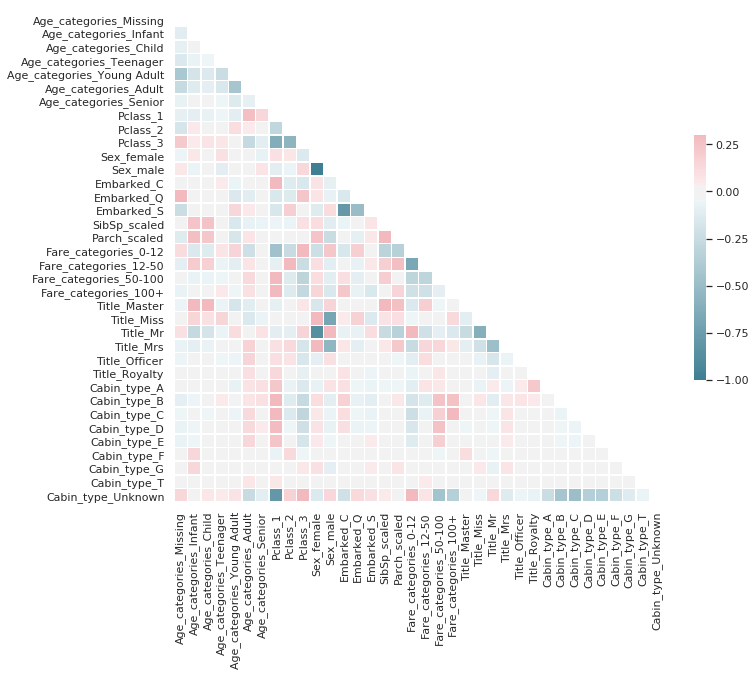

In [123]:
import numpy as np
import seaborn as sns

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50','Fare_categories_50-100', 'Fare_categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A','Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E','Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T', 'Cabin_type_Unknown']

plot_correlation_heatmap(train[columns])

### Final Feature Selection using RFECV

In [124]:
from sklearn.feature_selection import RFECV

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown']

all_X = train[columns]
all_y = train["Survived"]

lr = LogisticRegression(solver='lbfgs')
selector = RFECV(lr, cv=10)
selector.fit(all_X, all_y)

optimized_columns = all_X.columns[selector.support_]
optimized_columns

Index(['SibSp_scaled', 'Title_Mr', 'Title_Officer', 'Cabin_type_Unknown'], dtype='object')

### Training A Model Using our Optimized Columns

In [125]:
all_X = train[optimized_columns]
all_y = train["Survived"]

lr = LogisticRegression(solver='lbfgs')
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = scores.mean()
accuracy

0.8226549199863807

### Submitting our Model to Kaggle

In [126]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[optimized_columns])

submission_df = {"PassengerId":holdout["PassengerId"], 
                 "Survived":holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission_2.csv", index=False)
pd.read_csv('submission_2.csv').head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# *Model Selection and Tuning*
### Introducing Model Selection

In [127]:
train = pd.read_csv('train_modified.csv')
holdout = pd.read_csv('holdout_modified.csv')

train.head()

,Survived,PassengerId,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_scaled,Parch_scaled,Fare_scaled,Fare_categories_0-12,Fare_categories_12-50,Fare_categories_50-100,Fare_categories_100+,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown
0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.125,0.0,0.014151,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,2,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0.125,0.0,0.139136,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,3,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0.000,0.0,0.015469,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,4,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0.125,0.0,0.103644,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,5,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.000,0.0,0.015713,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


### Training a Baseline Model

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

all_X = train.drop(['Survived','PassengerId'],axis=1)
all_y = train['Survived']

lr = LogisticRegression(solver='lbfgs')
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy_lr = scores.mean()
accuracy_lr

0.8250025536261492

### Training a Model using K-Nearest Neighbors

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, all_X, all_y, cv=10)
accuracy_knn = scores.mean()
accuracy_knn

0.7857382816933379

### Exploring Different K Values

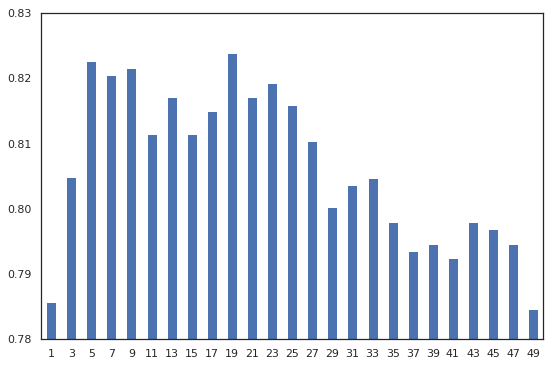

In [135]:
import matplotlib.pyplot as plt

def plot_dict(dictionary):
    pd.Series(dictionary).plot.bar(figsize=(9,6),
                                   ylim=(0.78,0.83),rot=0)
    plt.show()

knn_scores = dict()

for n in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, all_X, all_y, cv=10)
    accuracy_knn = scores.mean()
    knn_scores[n] = accuracy_knn
    
plot_dict(knn_scores)

### Automating Hyperparameter Optimization with Grid Search

In [136]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = hyperparameters, cv=10)
grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_

### Submitting K-Nearest Neighbors Predictions to Kaggle

In [138]:
holdout_no_id = holdout.drop(['PassengerId'],axis=1)
best_knn = grid.best_estimator_

holdout_predictions = best_knn.predict(holdout_no_id)

holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_3.csv",index=False)
pd.read_csv('submission_3.csv').head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### Introducing Random Forests

In [141]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=10)
scores = cross_val_score(clf, all_X, all_y, cv=10)
accuracy_rf = scores.mean()
accuracy_rf

0.8070125411417546

### Tuning our Random Forests Model with GridSearch

In [143]:
clf = RandomForestClassifier(random_state=1)

hyperparameters = {
    "criterion" : ["entropy", "gini"],
    "max_depth": [5, 10],
    "max_features": ["log2", "sqrt"],
    "min_samples_leaf": [1, 5],
    "min_samples_split" : [3, 5],
    "n_estimators" : [6,9]
}

grid = GridSearchCV(clf, param_grid=hyperparameters, cv=10)
grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_

print(best_params)
print(best_score)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}
0.8428731762065096


/home/naveen/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Submitting Random Forest Predictions to Kaggle

In [144]:
# The `GridSearchCV` object is stored in memory from
# the previous screen with the variable name `grid`

holdout_no_id = holdout.drop(['PassengerId'],axis=1)
best_rf = grid.best_estimator_

holdout_predictions = best_rf.predict(holdout_no_id)

holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_4.csv",index=False)
pd.read_csv('submission_4.csv').head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
